In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv('tweets.csv')
df

,created_at,user_id,username,name,place,tweet,language,replies_count,hashtags,sentiment
0,2021-04-27 23:55:06 UTC,23772644,bbcindonesia,BBC News Indonesia,NaN,"Varian baru Covid India sudah masuk Indonesia,...",in,15,[],NEGATIVE
1,2021-04-27 23:35:39 UTC,17128975,cnnindonesia,CNN Indonesia,NaN,Badai Covid India hingga Junta Myanmar Pikir-p...,in,0,['kilasinternasional'],NEGATIVE
2,2021-04-27 23:18:00 UTC,61377303,lintas_mnctv,Lintas_MNCTV,NaN,Peringatan WHO: Krisis Covid India Bisa Makin ...,in,0,[],NEGATIVE
3,2021-04-27 23:16:27 UTC,576348125,nagma_morarji,Nagma,NaN,German Army working around the clock to help I...,en,0,"['covidemergency2021', 'covidsecondwaveinindia...",NEGATIVE
4,2021-04-27 22:04:08 UTC,559652727,pkashwan,Prakash Kashwan प्रकाश कसवाँ,NaN,"TBC, this is an old report. The point is that ...",en,0,"['covidindiainfo', 'covidindia2021', 'covidind...",NEGATIVE
...,...,...,...,...,...,...,...,...,...,...
9650,2020-03-06 17:13:33 UTC,4888435970,dipika_bajpai,Dipika Bajpai,NaN,"#COVID OR no Covid, India is not China or USA....",en,3,['covid'],NEGATIVE
9651,2020-03-04 05:36:35 UTC,31059478,toihyderabad,TOI Hyderabad,NaN,Watch #CoronaVirusUpdate from Gandhi Hospital ...,en,1,"['coronavirusupdate', 'secunderabad', 'coronav...",NEGATIVE
9652,2020-03-03 11:14:53 UTC,31059478,toihyderabad,TOI Hyderabad,NaN,#CoronavirusUpdate || A 15 member team from #T...,en,1,"['coronavirusupdate', 'telangana', 'kerala', '...",POSITIVE
9653,2020-03-02 12:39:20 UTC,73043514,gargirawat,Gargi Rawat,NaN,Ye gads ... Now NDTV’s @harsha_ndtv reports a...,en,4,"['coronaoutbreak', 'covid', 'india']",NEGATIVE


In [3]:
df.head()

,created_at,user_id,username,name,place,tweet,language,replies_count,hashtags,sentiment
0,2021-04-27 23:55:06 UTC,23772644,bbcindonesia,BBC News Indonesia,NaN,"Varian baru Covid India sudah masuk Indonesia,...",in,15,[],NEGATIVE
1,2021-04-27 23:35:39 UTC,17128975,cnnindonesia,CNN Indonesia,NaN,Badai Covid India hingga Junta Myanmar Pikir-p...,in,0,['kilasinternasional'],NEGATIVE
2,2021-04-27 23:18:00 UTC,61377303,lintas_mnctv,Lintas_MNCTV,NaN,Peringatan WHO: Krisis Covid India Bisa Makin ...,in,0,[],NEGATIVE
3,2021-04-27 23:16:27 UTC,576348125,nagma_morarji,Nagma,NaN,German Army working around the clock to help I...,en,0,"['covidemergency2021', 'covidsecondwaveinindia...",NEGATIVE
4,2021-04-27 22:04:08 UTC,559652727,pkashwan,Prakash Kashwan प्रकाश कसवाँ,NaN,"TBC, this is an old report. The point is that ...",en,0,"['covidindiainfo', 'covidindia2021', 'covidind...",NEGATIVE


In [4]:
df.sample()

,created_at,user_id,username,name,place,tweet,language,replies_count,hashtags,sentiment
8732,2020-03-18 06:37:51 UTC,3270754584,is_gopika_tnie,Gopika I S,NaN,@xpresskerala In Thiruvananthapuram #covidind...,hi,0,"['covidindia', 'covid19']",NEGATIVE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9655 entries, 0 to 9654
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created_at     9655 non-null   object
 1   user_id        9655 non-null   int64 
 2   username       9655 non-null   object
 3   name           9655 non-null   object
 4   place          1 non-null      object
 5   tweet          9655 non-null   object
 6   language       9655 non-null   object
 7   replies_count  9655 non-null   int64 
 8   hashtags       9655 non-null   object
 9   sentiment      9655 non-null   object
dtypes: int64(2), object(8)
memory usage: 754.4+ KB


In [6]:
df.drop(['place'], axis = 1, inplace = True)

In [7]:
W = df.columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in W:
    df[i] = le.fit_transform(df[i])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9655 entries, 0 to 9654
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   created_at     9655 non-null   int64
 1   user_id        9655 non-null   int64
 2   username       9655 non-null   int64
 3   name           9655 non-null   int64
 4   tweet          9655 non-null   int64
 5   language       9655 non-null   int64
 6   replies_count  9655 non-null   int64
 7   hashtags       9655 non-null   int64
 8   sentiment      9655 non-null   int64
dtypes: int64(9)
memory usage: 679.0 KB


In [9]:
df

,created_at,user_id,username,name,tweet,language,replies_count,hashtags,sentiment
0,9549,205,232,228,6590,12,15,5374,0
1,9548,87,369,319,3039,12,0,3766,0
2,9547,443,935,871,5488,12,0,5374,0
3,9546,1062,1074,1020,4061,6,0,2150,0
4,9545,1057,1265,1220,5930,6,0,2837,0
...,...,...,...,...,...,...,...,...,...
9650,4,1537,448,460,425,6,3,1477,0
9651,3,251,1744,1585,6640,6,1,1281,0
9652,2,251,1744,1585,874,6,1,1282,1
9653,1,493,606,600,6900,6,4,508,0


In [10]:
df.corr()

,created_at,user_id,username,name,tweet,language,replies_count,hashtags,sentiment
created_at,1.000000,-0.129123,0.013494,0.009529,-0.046139,-0.230223,0.051176,0.128259,0.076472
user_id,-0.129123,1.000000,-0.042993,-0.144591,0.239392,0.313056,-0.071873,0.013258,-0.055425
username,0.013494,-0.042993,1.000000,0.772560,-0.031641,-0.093802,0.017665,-0.014696,0.021199
name,0.009529,-0.144591,0.772560,1.000000,-0.097059,-0.099472,0.027385,0.025061,-0.001111
tweet,-0.046139,0.239392,-0.031641,-0.097059,1.000000,0.252936,0.014239,0.035346,-0.061308
language,-0.230223,0.313056,-0.093802,-0.099472,0.252936,1.000000,-0.064364,-0.029429,-0.201087
replies_count,0.051176,-0.071873,0.017665,0.027385,0.014239,-0.064364,1.000000,0.040569,0.059656
hashtags,0.128259,0.013258,-0.014696,0.025061,0.035346,-0.029429,0.040569,1.000000,0.087251
sentiment,0.076472,-0.055425,0.021199,-0.001111,-0.061308,-0.201087,0.059656,0.087251,1.000000


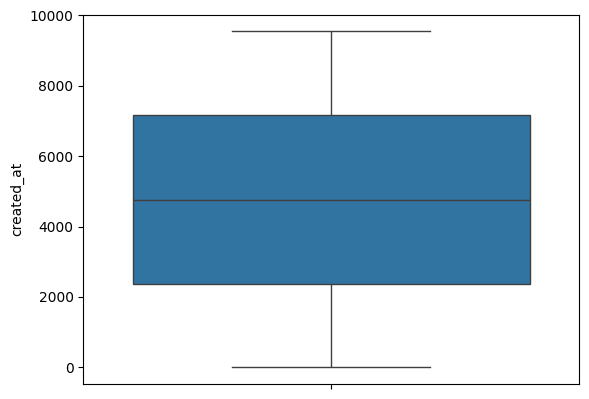

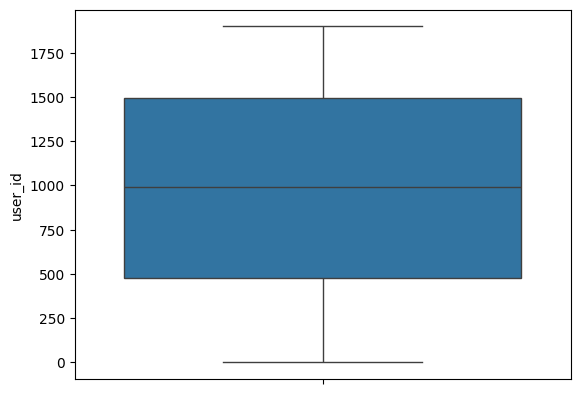

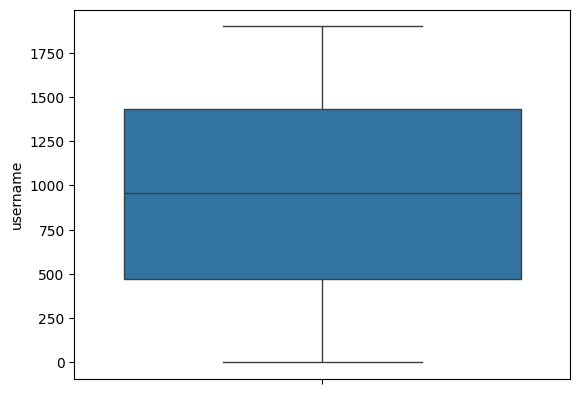

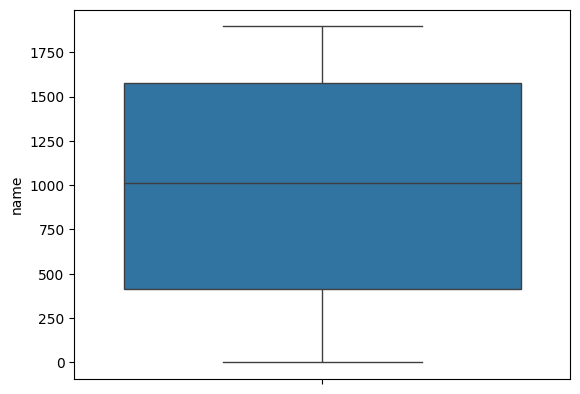

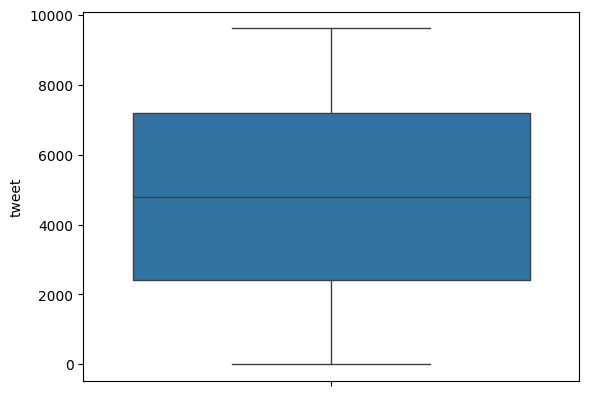

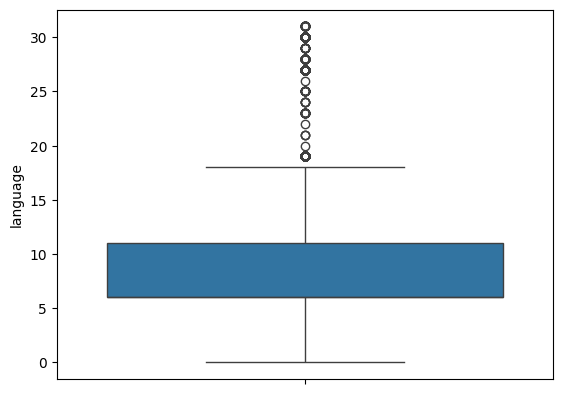

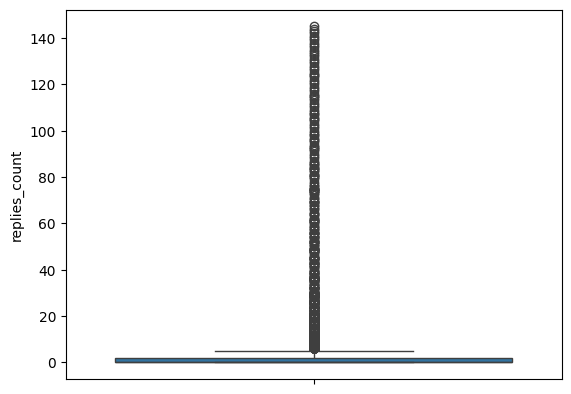

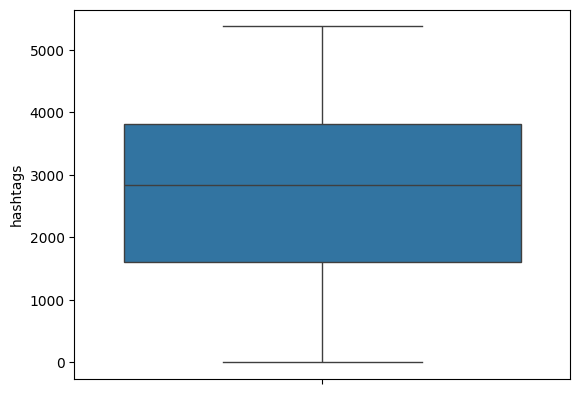

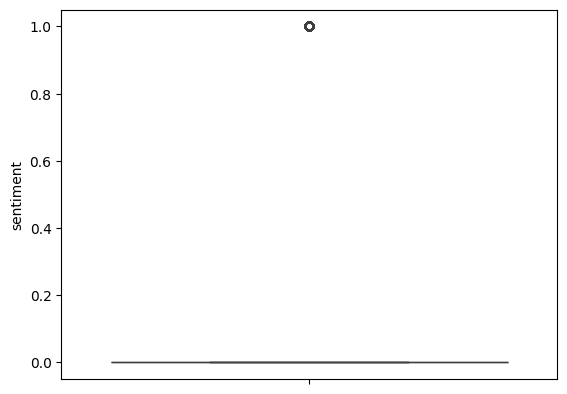

In [11]:
W = df.columns

for i in W:
  sns.boxplot(df[i])
  plt.show()

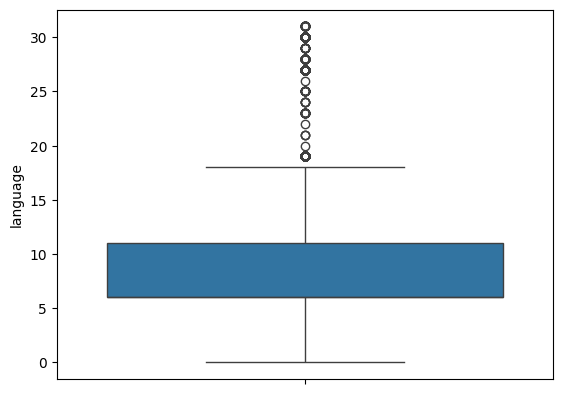

In [12]:
z_scores = np.abs((df['language'] - df['language'].mean()) / df['language'].std())
df = df[z_scores < 10]

sns.boxplot(df['language'])
plt.show()

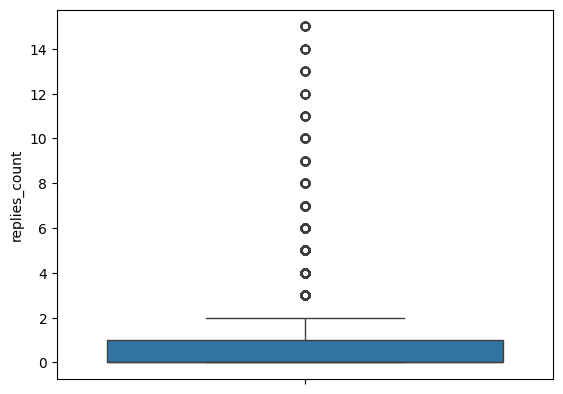

In [13]:
z_scores = np.abs((df['replies_count'] - df['replies_count'].mean()) / df['replies_count'].std())
df = df[z_scores < 1]

sns.boxplot(df['replies_count'])
plt.show()

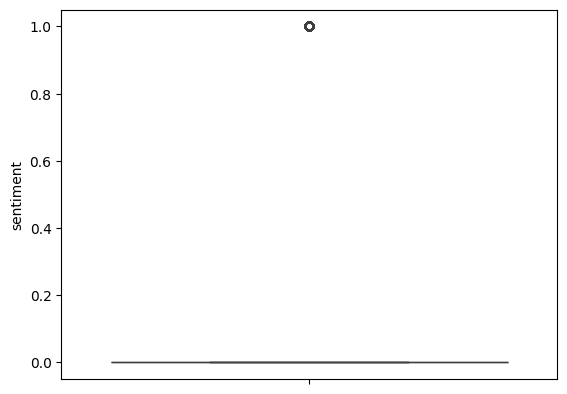

In [14]:
z_scores = np.abs((df['sentiment'] - df['sentiment'].mean()) / df['sentiment'].std())
df = df[z_scores < 3]

sns.boxplot(df['sentiment'])
plt.show()

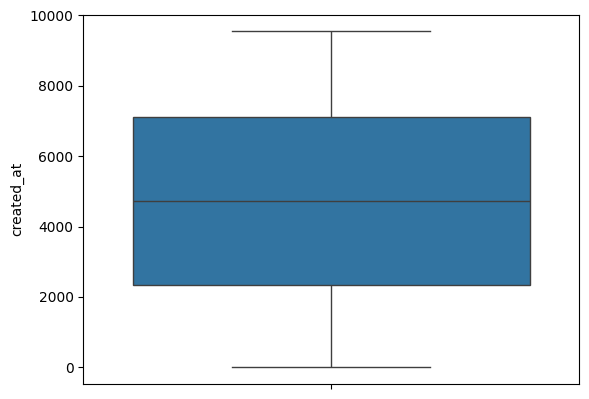

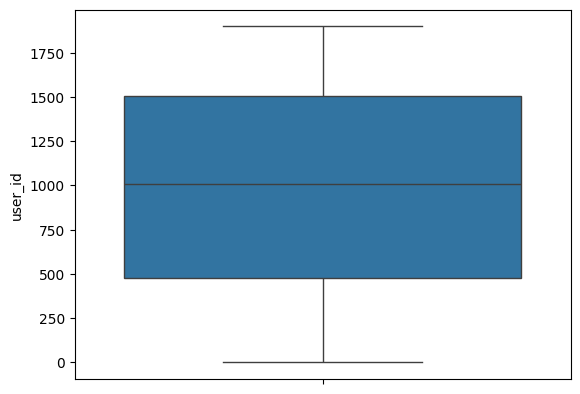

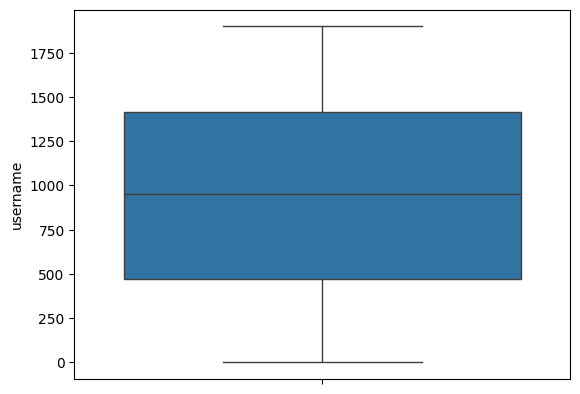

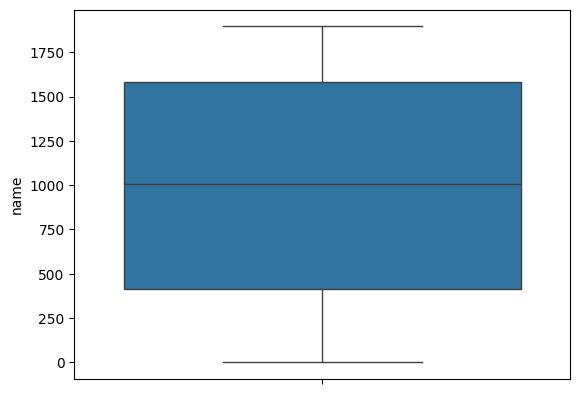

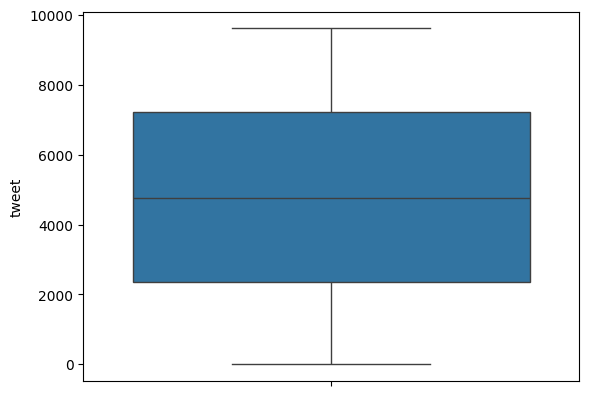

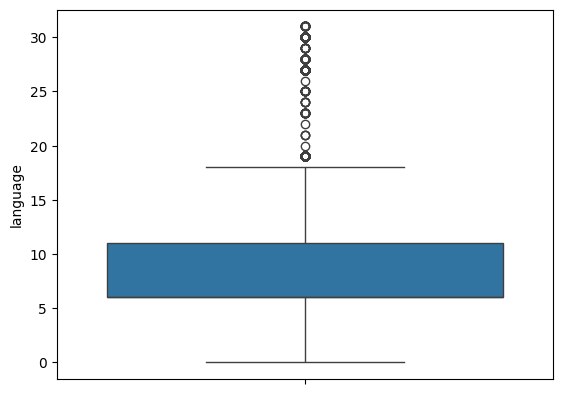

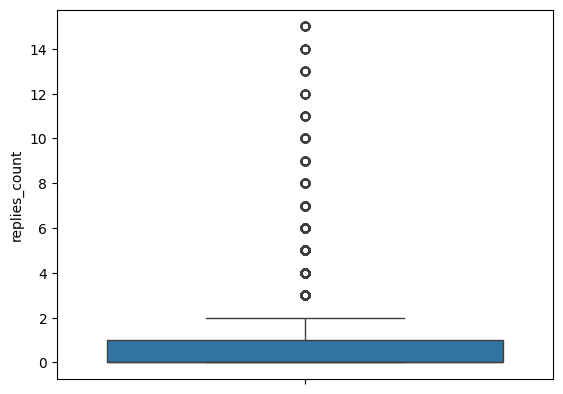

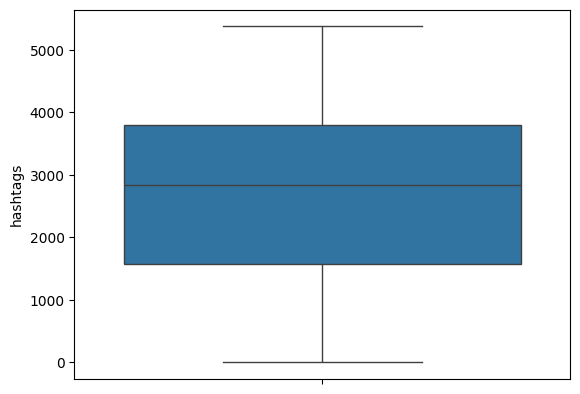

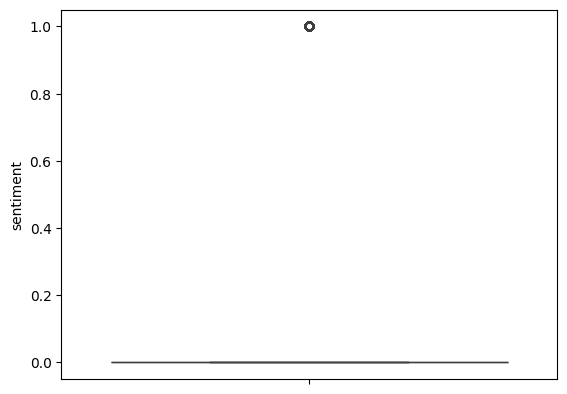

In [15]:
W = df.columns

for i in W:
  sns.boxplot(df[i])
  plt.show()

since we have to classify the sentiment and it has 3 categories so we'll apply classification.

# Predicting Sentiments using Classification

In [16]:
df.head()

,created_at,user_id,username,name,tweet,language,replies_count,hashtags,sentiment
0,9549,205,232,228,6590,12,15,5374,0
1,9548,87,369,319,3039,12,0,3766,0
2,9547,443,935,871,5488,12,0,5374,0
3,9546,1062,1074,1020,4061,6,0,2150,0
4,9545,1057,1265,1220,5930,6,0,2837,0


In [17]:
df.drop(['user_id'], axis = 1, inplace = True)
df.drop(['name'], axis = 1, inplace = True)
df.drop(['tweet'], axis = 1, inplace = True)

In [18]:
df.head(1)

,created_at,username,language,replies_count,hashtags,sentiment
0,9549,232,12,15,5374,0


In [19]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [20]:
X

array([[9549,  232,   12,   15, 5374],
       [9548,  369,   12,    0, 3766],
       [9547,  935,   12,    0, 5374],
       ...,
       [   2, 1744,    6,    1, 1282],
       [   1,  606,    6,    4,  508],
       [   0, 1744,    6,    1, 3672]])

In [21]:
Y

array([0, 0, 0, ..., 1, 0, 0])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [23]:
X

array([[9549,  232,   12,   15, 5374],
       [9548,  369,   12,    0, 3766],
       [9547,  935,   12,    0, 5374],
       ...,
       [   2, 1744,    6,    1, 1282],
       [   1,  606,    6,    4,  508],
       [   0, 1744,    6,    1, 3672]])

In [24]:
Y

array([0, 0, 0, ..., 1, 0, 0])

# ***LOGISTIC REGRESSION***

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [26]:
Y_pred = classifier.predict(X_test)

In [27]:
#confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
cm
accuracy_score(Y_test, Y_pred)

0.881429344883595

# ***KNN***

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'manhattan')
classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [29]:
Y_pred = classifier.predict(X_test)

In [30]:
#confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
cm
accuracy_score(Y_test, Y_pred)

0.8852192744991879

# ***SVM***

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, Y_train)

SVC()

In [33]:
Y_pred = classifier.predict(X_test)

In [34]:
#confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
cm
accuracy_score(Y_test, Y_pred)

0.8852192744991879

# ***NAVE BAYES***

In [35]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, Y_train)

BernoulliNB()

In [36]:
Y_pred = classifier.predict(X_test)

In [37]:
#confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
cm
accuracy_score(Y_test, Y_pred)

0.8852192744991879

# ***DECISION TREE***

In [38]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [39]:
#confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
cm
accuracy_score(Y_test, Y_pred)

0.8435300487276665

# ***RANDOM FOREST***

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [41]:
Y_pred = classifier.predict(X_test)

In [42]:

#confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
cm
accuracy_score(Y_test, Y_pred)

0.879263670817542

# ***ANN***

In [43]:
X.shape

(9235, 5)

In [44]:
df.shape

(9235, 6)

In [45]:
X.size

46175

In [46]:
ann = tf.keras.models.Sequential()

In [47]:
ann.add(tf.keras.layers.Dense(units = 47335, activation = 'relu'))

In [48]:
ann.add(tf.keras.layers.Dense(units = 10045, activation = 'relu'))

In [49]:
ann.add(tf.keras.layers.Dense(units = 5034, activation = 'relu'))

In [50]:
ann.add(tf.keras.layers.Dense(units = 1356, activation = 'relu'))

In [51]:
ann.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid'))

In [52]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
ann.fit(X_train, Y_train, epochs= 5)

Epoch 1/5
  6/231 ━━━━━━━━━━━━━━━━━━━━ 40:46 11s/step - accuracy: 0.5994 - loss: 1.2120

KeyboardInterrupt: 

In [ ]:
Y_pred = ann.predict(X_test)
Y_pred = (Y_pred > 0.5)
print(np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

In [ ]:
import seaborn as sn
from matplotlib import pyplot as plt
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
data = np.array([0.8814,0.8852,0.8852,0.8435,0.8442,0.8819,0.8852 ])

# providing an index
ser = pd.Series(data, index=['Logistic Regression', 'KNN', 'SVM', 'NAIVE_BAYES', 'DECSION_TREE', 'RANDOM_FOREST', 'ANN'])

print(ser)

Logistic Regression    0.8814
KNN                    0.8852
SVM                    0.8852
NAIVE_BAYES            0.8435
DECSION_TREE           0.8442
RANDOM_FOREST          0.8819
ANN                    0.8852
dtype: float64
